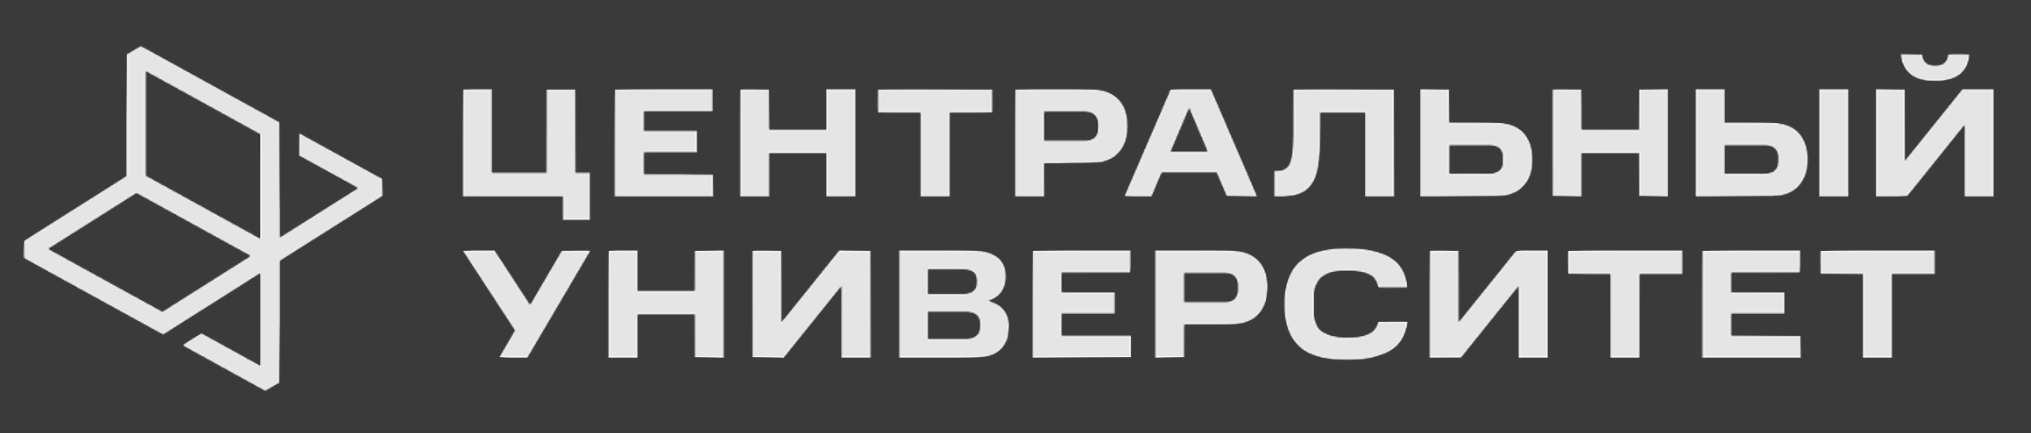

# Домашнее задание 8. Generative models.

## Максимальное кол-во баллов: 100

___
## Cроки

Дата выдачи: TBD

Жесткий дедлайн: TBD



---

# Важно! О формате сдачи

* **При решении ноутбука используйте данный шаблон. Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно**
* **Везде, где в формулровке задания есть какой-либо вопрос (или просьба вывода), необходимо прописать ответ в ячейку (код или markdown).**
* **Наличие кода решения обязательно. Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.**
*  **Если в ячейке написана фраза "Вывод"/"Ответ на вопрос"/"Ваш текст" и пр., то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно).**
* **Если в ячейке написано "Your code here"/"Ваш код" и пр., то ожидается ответ в виде кода (можете добавить больше ячеек с кодом, если считаете это необходимым, но это необязательно).**
* **Если есть и ячейка с фразой "Вывод" и пр., и ячейка с фразой "Your code here" и пр., то в ответе ожидается и код, и текст)**
* **Если в формулировке задания явно не указывается сигнатура функции, можно пользоваться своими методами**
___


Привет! В этой домашке тебе предстоит подчинить себе генерацию, а именно реализовать conditional-варианты архитектур VAE/GAN

**Важно**:
1. архитектуры должны быть реализованы при помощи сверточных слоев `nn.Conv2d`, решения без сверток засчитываться не будут, но можно добавлять `nn.Linear` по необходимости
2. чекпоинты, ноутбук и используемые модули(архитектуры рекомендуется разбить на модули для читаемости) должны быть прикреплены к решению
3. можешь оставить requirements.txt чтобы облегчить проверяющим жизнь

---

## <font color='orange'>Задание 0: Данные [5 баллов]</font>

Работать будем с хорошо известным вам датасетом циферок, ниже его надо будет скачать при помощи `torchvision API`

![](https://user-images.githubusercontent.com/47734496/60438108-8b894000-9c2d-11e9-9cbb-1c06e3fb90a7.png)

Размер картинок: 28x28x1, трейн/тест сплиты: 60000, 10000

Лики данных допустимы, можете использовать все данные как трейн, только оставьте какую-то часть на валидацию(понадобится для графиков функций потерь)

# ВЕСА ОБУЧЕННЫХ МОДЕЛЕЙ ДЛЯ ЗАДАНИЙ
### https://disk.yandex.ru/d/Fa5nN7uYghAhbA

---

### 0.1. [5 баллов]
### Формулировка задания:

1. Визуализируй семплы из датесетов для твоего:
- трейна
- инференса
2. Выведи размеры train/val сплитов


Нормализовывать картинки не обязательно, используй референсы ниже как пример

In [ ]:
import torch
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os
import random
import numpy as np
from tqdm import tqdm


In [ ]:
seed = 42

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


seed_everything(seed)

In [ ]:
# Трансформации для train и val
train_transforms = transforms.Compose([
    transforms.ToTensor()
])

val_transforms = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
from torchvision.datasets import MNIST

train_dataset = MNIST(root='mnist_dataset', train=True, transform=train_transforms, download=True)
val_dataset = MNIST(root='mnist_dataset', train=False, transform=val_transforms, download=True)

len(train_dataset), len(val_dataset)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.6MB/s]


Extracting mnist_dataset/MNIST/raw/train-images-idx3-ubyte.gz to mnist_dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 486kB/s]


Extracting mnist_dataset/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.49MB/s]


Extracting mnist_dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.62MB/s]

Extracting mnist_dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_dataset/MNIST/raw



(60000, 10000)

In [ ]:
# Функция визуализации картинок
def show_transforms(dataset, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 2))
    for i in range(num_images):
        img, label = dataset[i]
        axes[i].imshow(img.squeeze(), cmap='gray')  # убираем лишнюю размерность, если есть
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.show()

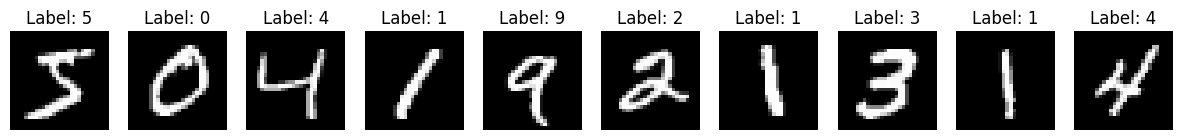

In [ ]:
show_transforms(train_dataset, num_images=10)

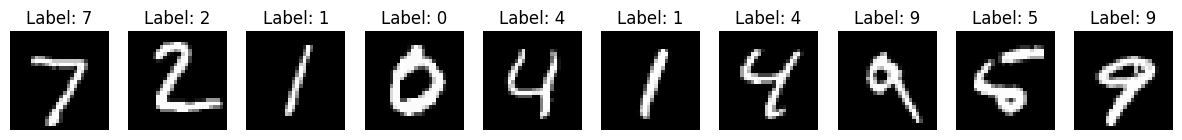

In [ ]:
show_transforms(val_dataset, num_images=10)

---

## <font color='orange'>Задание 1: Conditional VAE [45 баллов] + 5 баллов за функцию метрики</font>

![](https://drive.google.com/uc?export=view&id=1-GQwHMBFpY8W1hiOO_yuIOh8yfcAox6D)

![](https://drive.google.com/uc?export=view&id=1DIAUPy88plSiuA8n9ElkLnmg8nTd-vuH)

Note: подумай как еще можно закодировать лейблы с помощью `nn.Embedding` вместо `one-hot`-представления. Скорее всего, так будет лучше учиться

---

### 1.1. [10 баллов]
### Формулировка задания:

Реализуй conditional-автоэнкодер, можешь использовать картинку выше как референс, не запрещается использовать более интересные подходы

Артефактом к данному пункту будет служить модуль с автоэнкодером или клетка с объявлением класса

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConditionalConvVAE(nn.Module):
    def __init__(self, num_classes=10, latent_dim=16):
        super(ConditionalConvVAE, self).__init__()
        self.num_classes = num_classes
        self.latent_dim = latent_dim

        # Слой embedding для меток
        self.label_embedding = nn.Embedding(num_classes, latent_dim)  # Преобразуем метки в векторы размером latent_dim

        # ===== ENCODER =====
        self.encoder_conv = nn.Sequential(
            nn.Conv2d(1 + latent_dim, 32, kernel_size=3, stride=2, padding=1),  # Добавляем embedding к изображениям
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        # Получаем выход из энкодера для линейного слоя
        self.fc_mu = nn.Linear(128 * 4 * 4, latent_dim)
        self.fc_logvar = nn.Linear(128 * 4 * 4, latent_dim)

        # ===== DECODER =====
        self.fc_decode = nn.Linear(latent_dim + latent_dim, 128 * 4 * 4)  # Конкатенируем латентное пространство и embedding

        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),   # 4x4 -> 8x8
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),    # 8x8 -> 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),    # 16x16 -> 32x32
            nn.ReLU(),
            nn.Conv2d(16, 1, kernel_size=5, stride=1, padding=0),                                 # 32x32 -> 28x28
            nn.Sigmoid(),
        )

    def encode(self, x, y):
        # Получаем embedding для меток
        y_embedding = self.label_embedding(y)  # Размер: [batch_size, latent_dim]

        # Изменяем размерность embedding до [batch_size, latent_dim, 28, 28]
        y_embedding = y_embedding.view(-1, self.latent_dim, 1, 1).expand(-1, self.latent_dim, 28, 28)

        # Конкатенируем изображение и embedding
        x_cat = torch.cat([x, y_embedding], dim=1)  # Размер: [batch_size, 1 + latent_dim, 28, 28]

        h = self.encoder_conv(x_cat)
        h = h.view(h.size(0), -1)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z, y):
        # Получаем embedding для меток
        y_embedding = self.label_embedding(y)  # Размер: [batch_size, latent_dim]

        # Конкатенируем латентный вектор и embedding метки
        z_cat = torch.cat([z, y_embedding], dim=1)  # Размер: [batch_size, latent_dim * 2]

        h = self.fc_decode(z_cat)
        h = h.view(h.size(0), 128, 4, 4)
        out = self.decoder_conv(h)
        return out

    def forward(self, x, y):
        mu, logvar = self.encode(x, y)
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z, y)
        return recon_x, mu, logvar


# Функция потерь
def loss_function(recon_x, x, mu, logvar):
    BCE = F.mse_loss(recon_x, x, reduction='sum')  # Применяем MSE для реконструкции

    # KL Divergence между аппроксимированным распределением q(z|x) и нормальным распределением p(z)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD


---

### 1.2. [5 баллов]
### Формулировка задания:

Обучи модель и визуализируй историю лоссов по эпохам на train/val сплитах(вторая картинка на референсе необязательная)

Должно получиться что-то похожее на референсную картинку ниже

Артефакт: веса обученной модели

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

trainset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(trainset, batch_size=128, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, drop_last=True)

In [ ]:
device

device(type='cuda')

Epoch [15/15]
Train Loss: 24.3404 | Val Loss: 24.3036


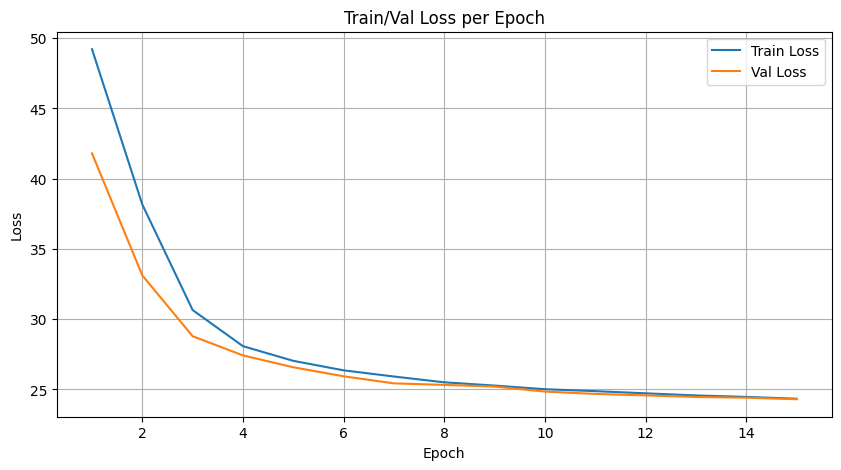

In [ ]:
epochs = 15
latent_dim = 32
model = ConditionalConvVAE(num_classes=10, latent_dim=latent_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

train_losses = []
val_losses = []

plt.ion()  # интерактивный режим графика

for epoch in range(epochs):
    model.train()
    train_loss = 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        recon_images, mu, logvar = model(images, labels)
        loss = loss_function(recon_images, images, mu, logvar)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, labels in tqdm(val_loader):
            images, labels = images.to(device), labels.to(device)
            recon_images, mu, logvar = model(images, labels)
            loss = loss_function(recon_images, images, mu, logvar)
            val_loss += loss.item()

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    # Вывод
    clear_output(wait=True)
    print(f'Epoch [{epoch+1}/{epochs}]')
    print(f'Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epoch + 2), train_losses, label='Train Loss')
    plt.plot(range(1, epoch + 2), val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train/Val Loss per Epoch')
    plt.legend()
    plt.grid()
    plt.show()

plt.ioff()  # выключаем интерактив


In [ ]:
# Сохраняем веса модели
torch.save(model.state_dict(), 'conditional_conv_vae.pth')
print("Модель сохранена как 'conditional_conv_vae.pth'")

Модель сохранена как 'conditional_conv_vae.pth'


---

### 1.3. [5 баллов]
### Формулировка задания:

1. Реализуй функцию `show_grid_vae(...)`, используя шаблон ниже

2. Визуализируй результат для `digit=4, n_reps=9`

3. Добавь код загрузки весов обученной модели, чтобы проверяющему было удобно воспроизвести твой код

In [ ]:
@torch.no_grad()
def show_grid_vae(model=None, digit=0, n_reps=1, device=None):
    """
    Визуализатор сэмплов CVAE.

    Параметры:
        model torch.nn.Module: модель CVAE
        digit (int): генерируемая цифра
        n_reps (int): количество сэмплов
        device torch.device: девайс (CPU или CUDA)
    Возвращаемое значение:
        None
    """

    model.eval()

    # Шаг 1: Создаем латентные векторы
    z = torch.randn(n_reps, model.latent_dim).to(device)

    # Шаг 2: Готовим метки (digit -> one-hot)
    labels = torch.full((n_reps,), digit, dtype=torch.long).to(device)

    # Шаг 3: Прогоняем через decoder
    generated_images = model.decode(z, labels)

    # Шаг 4: Переводим тензоры на CPU и преобразуем в numpy
    generated_images = generated_images.cpu().numpy()

    # Шаг 5: Строим грид изображений
    fig, axes = plt.subplots(1, n_reps, figsize=(n_reps * 2, 2))

    if n_reps == 1:
        axes = [axes]

    for img, ax in zip(generated_images, axes):
        ax.imshow(img[0], cmap='gray')
        ax.axis('off')

    plt.suptitle(f'Generated samples for digit {digit}', fontsize=16)
    plt.show()


Пример:

In [ ]:
# Настраиваем устройство
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {DEVICE}')

# Параметры модели
NUM_CLASSES = 10

# Инициализируем и загружаем веса
model = ConditionalConvVAE(latent_dim=latent_dim, num_classes=NUM_CLASSES).to(DEVICE)

# Загрузка весов
model.load_state_dict(torch.load('conditional_conv_vae.pth', map_location=DEVICE))
model.eval()
print("Модель успешно загружена и готова к генерации.")



Using device: cuda
Модель успешно загружена и готова к генерации.


<ipython-input-21-a5acfe038584>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('conditional_conv_vae.pth', map_location=DEVICE))


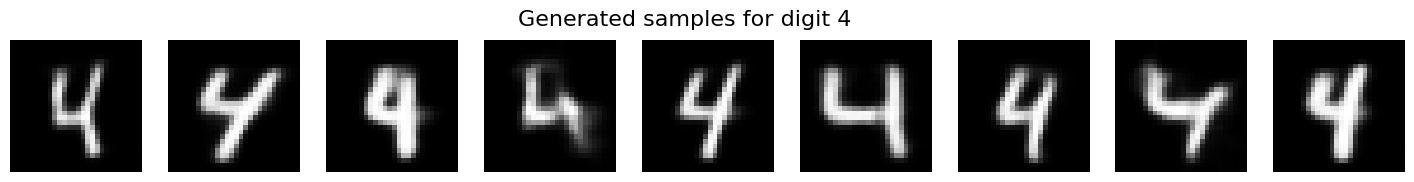

In [ ]:
# Вызов функции для генерации картинок
show_grid_vae(
    model=model,
    digit=4,     # генерируем цифру 4
    n_reps=9,    # 9 примеров
    device=DEVICE
)


---

### 1.4. [25 баллов] + 5 баллов за корректную реализацию функции из п.п. 1
### Формулировка задания:

1. Реализуй функцию `compute_acc_vae(...)`, используя шаблон ниже

2. Выведи результат для `n_reps=100`

Итоговый балл за этот пункт рассчитывается по формуле:

- int(mean_acc * 25), где mean_acc лежит в [0, 1]


In [ ]:
!unzip /content/lenet-73617234-ba26-4f18-b6a7-7b011905962e.zip

Archive:  /content/lenet-73617234-ba26-4f18-b6a7-7b011905962e.zip
  inflating: lenet.py                
   creating: weights/
  inflating: weights/lenet_epoch=12_test_acc=0.991.pth  


In [ ]:
import torchvision.transforms as TT
from lenet import LeNet5
import torch

classiffier_model = LeNet5().eval()
classiffier_model.load_state_dict(torch.load('weights/lenet_epoch=12_test_acc=0.991.pth', weights_only=True))
classiffier_model = classiffier_model.to(DEVICE)

transform = TT.Compose([
    TT.Resize(size=(32, 32), antialias=True)
])

In [ ]:
@torch.no_grad
def compute_acc_vae(model=None, n_reps=1, device=None):
    """
    CVAE accuracy.
    Алгоритм:
        1. Цикл по цифрам (от 0 до 9):
            a. Генерируем n_reps изображений с одинаковым лейблом D.
            b. Рассчитываем accuracy классификатора (в идеале все предсказания должны быть D).
            c. Сохраняем результат для каждой цифры.
        2. Считаем (mean, std) для получившегося буфера.
        3. Возвращаем (mean, std).

    Параметры:
        model (torch.nn.Module): модель CVAE.
        n_reps (int): количество сэмплов.
        device (torch.device): девайс для вычислений.

    Возвращаемое значение:
        (mean, std) (float, float): среднее и стандартное отклонение точности для каждой цифры.
    """
    classiffier_model.eval()  # Убедимся, что модель классификатор работает в режиме оценки
    classiffier_model.to(device)

    accuracies = []

    for digit in range(10):  # Цикл по цифрам от 0 до 9
        correct_preds = 0
        for _ in tqdm(range(n_reps)):
            # Генерируем изображение с данным лейблом
            labels = torch.full((1,), digit, dtype=torch.long, device=device)  # Создаем лейблы для цифры
            z = torch.randn(1, model.latent_dim, device=device)  # Сэмплируем латентное пространство
            recon_image = model.decode(z, labels)  # Генерируем изображение через декодер

            # Преобразуем изображение и классифицируем его
            recon_image = transform(recon_image.squeeze(0).cpu())  # Преобразуем изображение в нужный формат
            recon_image = recon_image.unsqueeze(0).to(device)  # Добавляем batch dimension

            # Классификация
            output = classiffier_model(recon_image)  # Получаем предсказания классификатора
            _, predicted = torch.max(output, 1)  # Находим класс с наибольшей вероятностью

            if predicted == digit:  # Если предсказание совпало с цифрой
                correct_preds += 1

        accuracy = correct_preds / n_reps
        accuracies.append(accuracy)

    mean_acc = np.mean(accuracies)
    std_acc = np.std(accuracies)

    return mean_acc, std_acc

In [ ]:
mu, sigma = compute_acc_vae(
    model=model,
    n_reps=100,
    device=DEVICE
)

mu, sigma

100%|██████████| 100/100 [00:00<00:00, 797.19it/s]


(0.993, 0.01100000000000001)

---

## <font color='orange'>Задание 2: Conditional GAN [45 баллов]</font>

![](https://drive.google.com/uc?export=view&id=1k0C7KI6hOrCuOpa4UmZMNPy2wnjZpaBO)

---

### 2.1. [10 баллов]
### Формулировка задания:

Реализуй conditional-GAN, можешь использовать картинку выше как референс, не запрещается использовать более интересные подходы

Артефактом к данному пункту будет служить модуль с автоэнкодером или клетка с объявлением класса

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output
import torchvision.utils as vutils
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Параметры модели
img_size = 28
channels = 1
img_shape = (channels, img_size, img_size)
latent_dim = 100
num_classes = 10
embed_size = 20


class ConditionalGAN(nn.Module):
    def __init__(self):
        super(ConditionalGAN, self).__init__()

        self.generator = self.Generator()
        self.discriminator = self.Discriminator()

        self.adversarial_loss = nn.BCELoss()

        self.optimizer_G = optim.Adam(self.generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
        self.optimizer_D = optim.Adam(self.discriminator.parameters(), lr=0.0004, betas=(0.5, 0.999))


        self.g_losses = []
        self.d_losses = []
        self.val_scores = []

    class Generator(nn.Module):
        def __init__(self):
            super().__init__()

            self.label_emb = nn.Embedding(num_classes, embed_size)

            input_dim = latent_dim + embed_size

            self.init_size = img_size // 4  # 7 for MNIST (28/4)
            self.fc = nn.Sequential(
                nn.Linear(input_dim, 256 * self.init_size * self.init_size)
            )

            self.conv_blocks = nn.Sequential(
                nn.BatchNorm2d(256),
                nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1),  # 7 -> 14
                nn.BatchNorm2d(128),
                nn.ReLU(inplace=True),

                nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),   # 14 -> 28
                nn.BatchNorm2d(64),
                nn.ReLU(inplace=True),

                nn.Conv2d(64, channels, 3, stride=1, padding=1),
                nn.Tanh()
            )

        def forward(self, noise, labels):
            label_embedding = self.label_emb(labels)
            gen_input = torch.cat((noise, label_embedding), -1)
            out = self.fc(gen_input)
            out = out.view(out.size(0), 256, self.init_size, self.init_size)
            img = self.conv_blocks(out)
            return img


    class Discriminator(nn.Module):
        def __init__(self):
            super().__init__()

            self.label_emb = nn.Embedding(num_classes, img_size * img_size)

            self.model = nn.Sequential(
                nn.utils.spectral_norm(nn.Conv2d(channels + 1, 64, 4, stride=2, padding=1)),  # 28 -> 14
                nn.LeakyReLU(0.2, inplace=True),

                nn.utils.spectral_norm(nn.Conv2d(64, 128, 4, stride=2, padding=1)),           # 14 -> 7
                nn.LeakyReLU(0.2, inplace=True),

                nn.Flatten(),
                nn.Linear(128 * 7 * 7, 1),
                nn.Sigmoid(),
            )

        def forward(self, img, labels):
            label_embedding = self.label_emb(labels).view(labels.size(0), 1, img_size, img_size)
            d_in = torch.cat((img, label_embedding), dim=1)
            validity = self.model(d_in)
            return validity



    def evaluate_generator(self, val_loader):
        self.generator.eval()
        self.discriminator.eval()

        val_scores = []
        with torch.no_grad():
            for imgs, labels in val_loader:
                batch_size = imgs.size(0)

                z = torch.randn(batch_size, latent_dim, device=device)
                labels = labels.to(device)
                gen_imgs = self.generator(z, labels)

                validity = self.discriminator(gen_imgs, labels)
                val_scores.append(validity.mean().item())

        mean_score = sum(val_scores) / len(val_scores)
        self.generator.train()
        self.discriminator.train()

        return mean_score

    def update_plot(self, epoch):
        clear_output(wait=True)

        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        axs[0].plot(self.g_losses, label="Generator Loss", color='r')
        axs[0].plot(self.d_losses, label="Discriminator Loss", color='b')
        axs[0].legend()
        axs[0].set_title(f"Train Losses up to Epoch {epoch}")
        axs[0].set_xlabel("Epoch")
        axs[0].set_ylabel("Loss")

        axs[1].plot(self.val_scores, label="Val Score", color='g')
        axs[1].legend()
        axs[1].set_title(f"Validation Scores up to Epoch {epoch}")
        axs[1].set_xlabel("Epoch")
        axs[1].set_ylabel("Score")

        plt.show()

    def sample_images(self, epoch, n_row=10):
        self.generator.eval()

        z = torch.randn(n_row ** 2, latent_dim, device=device)
        labels = torch.tensor([num for _ in range(n_row) for num in range(n_row)], device=device)

        gen_imgs = self.generator(z, labels)
        gen_imgs = (gen_imgs + 1) / 2.0  # [0, 1]

        os.makedirs("images", exist_ok=True)
        vutils.save_image(gen_imgs, f"images/epoch_{epoch}.png", nrow=n_row, normalize=True)

        self.generator.train()

    def train_step(self, real_imgs, labels, discriminator_steps=1):
        batch_size = real_imgs.size(0)

        valid = torch.ones((batch_size, 1), device=device)
        fake = torch.zeros((batch_size, 1), device=device)

        # --- Train Generator ---
        self.optimizer_G.zero_grad()

        z = torch.randn(batch_size, latent_dim, device=device)
        gen_labels = torch.randint(0, num_classes, (batch_size,), device=device)

        gen_imgs = self.generator(z, gen_labels)

        validity = self.discriminator(gen_imgs, gen_labels)
        g_loss = self.adversarial_loss(validity, valid)

        g_loss.backward()
        self.optimizer_G.step()

        # --- Train Discriminator (Multiple Steps) ---
        self.optimizer_D.zero_grad()

        for _ in range(discriminator_steps):  # Train discriminator multiple times
            real_pred = self.discriminator(real_imgs, labels)
            d_real_loss = self.adversarial_loss(real_pred, valid)

            fake_pred = self.discriminator(gen_imgs.detach(), gen_labels)
            d_fake_loss = self.adversarial_loss(fake_pred, fake)

            d_loss = (d_real_loss + d_fake_loss) / 2

            d_loss.backward()

        self.optimizer_D.step()

        return g_loss.item(), d_loss.item()

    def train_model(self, train_loader, val_loader=None, epochs=50, sample_interval=10):
        os.makedirs("images", exist_ok=True)

        for epoch in range(epochs):
            loop = tqdm(train_loader, leave=True)

            g_loss_epoch = 0.0
            d_loss_epoch = 0.0
            batches = 0

            discriminator_steps = 1

            for i, (imgs, labels) in enumerate(loop):
                imgs = imgs.to(device)
                labels = labels.to(device)

                g_loss, d_loss = self.train_step(imgs, labels, discriminator_steps)

                g_loss_epoch += g_loss
                d_loss_epoch += d_loss
                batches += 1

                loop.set_description(f"Epoch [{epoch+1}/{epochs}]")
                loop.set_postfix(d_loss=d_loss, g_loss=g_loss)

            avg_g_loss = g_loss_epoch / batches
            avg_d_loss = d_loss_epoch / batches

            self.g_losses.append(avg_g_loss)
            self.d_losses.append(avg_d_loss)

            if val_loader is not None:
                val_score = self.evaluate_generator(val_loader)
                self.val_scores.append(val_score)
                print(f"Validation Score: {val_score:.4f}")
            else:
                self.val_scores.append(0)

            # --- Update Plot ---
            self.update_plot(epoch + 1)

            # --- Save Samples ---
            if (epoch + 1) % sample_interval == 0:
                self.sample_images(epoch + 1)


---

### 2.2. [5 баллов]
### Формулировка задания:

Обучи модель и визуализируй историю лоссов генератора и дискриминатора по эпохам(вторая и третья картинки на референсе необязательные)

Должно получиться что-то похожее на референсную картинку ниже

Артефакт: веса обученной модели

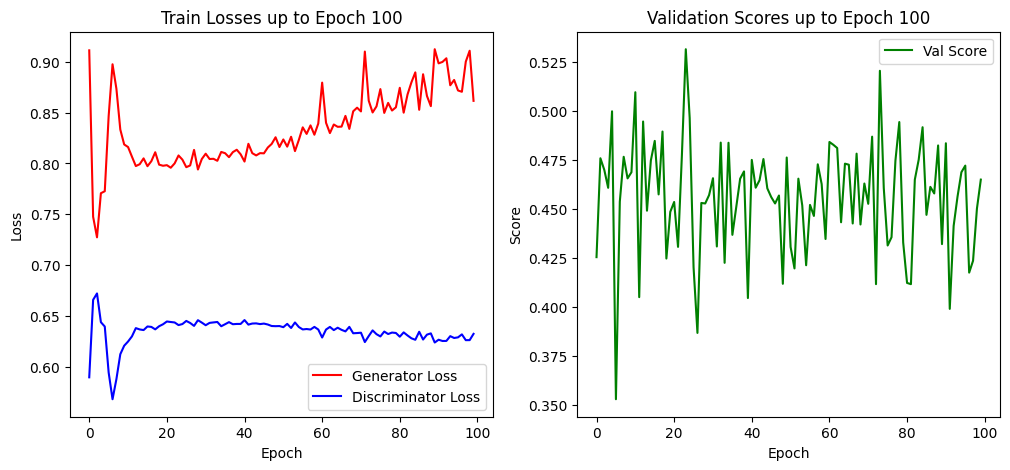

In [ ]:
gan = ConditionalGAN().to(device)

gan.train_model(train_loader, val_loader=val_loader, epochs=100, sample_interval=10)

In [ ]:
torch.save(gan.state_dict(), 'cgan.ckpt')

---

### 2.3. [5 баллов]
### Формулировка задания:

1. Реализуй функцию `show_grid_gan(...)`, используя шаблон ниже

2. Визуализируй результат для `digit=8, n_reps=9`

3. Добавь код загрузки весов обученной модели, чтобы проверяющему было удобно воспроизвести твой код

In [ ]:
@torch.no_grad()
def show_grid_gan(model=None, digit=0, n_reps=1, device=None):
    """
    Визуализатор семплов CGAN.

    Параметры:
        model (torch.nn.Module): модель генератора
        digit (int): генерируемая цифра
        n_reps (int): количество семплов
        device (torch.device): девайс (cpu/cuda)

    Возвращаемое значение:
        None
    """
    assert model is not None
    assert device is not None

    model.eval()

    # Генерация шума и меток
    noise = torch.randn(n_reps, latent_dim, device=device)
    labels = torch.full((n_reps,), digit, dtype=torch.long, device=device)

    # Генерация изображений
    generated_imgs = model(noise, labels)

    # Приводим изображения к [0, 1] для отображения
    generated_imgs = (generated_imgs + 1) / 2.0

    # Строим сетку изображений
    grid_img = vutils.make_grid(generated_imgs.cpu(), nrow=int(n_reps**0.5), normalize=True)

    plt.figure(figsize=(5, 5))
    plt.axis("off")
    plt.title(f"Generated samples of digit {digit}")
    plt.imshow(grid_img.permute(1, 2, 0).squeeze())
    plt.show()


Пример:

In [ ]:
# Загрузка модели целиком
gan_model = ConditionalGAN()
gan_model.load_state_dict(torch.load('cgan.ckpt', map_location=device))

# Извлечение генератора
generator = gan_model.generator.to(device)


<ipython-input-39-c85033263418>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gan_model.load_state_dict(torch.load('cgan.ckpt', map_location=device))


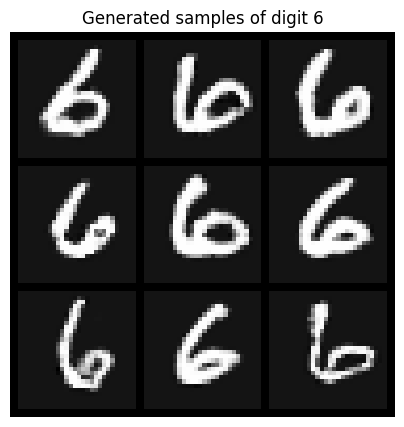

In [ ]:
# Визуализация 9 примеров для цифры 8
show_grid_gan(
    model=generator,
    digit=6,
    n_reps=9,
    device=device
)

---

### 2.4. [25 баллов]
### Формулировка задания:

1. Реализуй функцию ```compute_acc_gan(...)```, используя шаблон ниже

2. Выведи результат для `n_reps=100`

Итоговый балл за этот пункт рассчитывается по формуле:

- int(mean_acc * 25), где mean_acc лежит в [0, 1]

In [ ]:
import torchvision.transforms as TT
from lenet import LeNet5
import torch


classiffier_model = LeNet5().eval()
classiffier_model.load_state_dict(torch.load('weights/lenet_epoch=12_test_acc=0.991.pth', weights_only=True))
classiffier_model = classiffier_model.to(device)

transform = TT.Compose([
    TT.Resize(size=(32, 32), antialias=True)
])

In [ ]:
@torch.no_grad()
def compute_acc_gan(model=None, n_reps=1, device=None):
    """
    CGAN accuracy.
    Алгоритм:
        1. цикл по цифрам
            a. генерируем n_reps цифр с одинаковым лейблом D
            b. считаем accuracy классификатора classiffier_model (в идеале все предикты должны быть D)
            с. сохраняем результат усредненной метрики в буфер

        2. Считаем (mean, std) для получившегося буфера
        3. Возвращаем (mean, std)

    Параметры:
            model torch.nn.Module: модель CGAN
            n_reps (int): кол-во семплов
            device torch.device: девайс
    Возвращаемое значение:
            (mean, std) (float, float) рассчитаные по цифрам
    """

    accuracies = []  # Список для хранения точности для каждой цифры

    # Для каждой цифры (0-9)
    for label in range(10):
        correct = 0

        # Генерация n_reps изображений с одинаковым лейблом
        for _ in range(n_reps):
            z = torch.randn(1, latent_dim, device=device)  # Случайный шум
            labels = torch.tensor([label], device=device)  # Лейбл для генерации

            # Генерация изображения с этим лейблом
            gen_img = model.generator(z, labels)

            # Преобразование изображения для классификатора
            gen_img = (gen_img + 1) / 2.0  # Нормализуем изображение в диапазон [0, 1]
            gen_img = transform(gen_img.squeeze(0).cpu()).unsqueeze(0)  # Применяем трансформацию и добавляем batch

            # Получение предсказания от классификатора
            pred = classiffier_model(gen_img.to(device))  # Переносим изображение на нужное устройство
            pred_label = torch.argmax(pred, dim=1)  # Получаем метку с максимальной вероятностью

            # Проверка, совпадает ли предсказанная метка с истинной
            if pred_label.item() == label:
                correct += 1

        # Вычисление точности для данной цифры
        accuracy = correct / n_reps
        accuracies.append(accuracy)

    # Рассчитываем среднее и стандартное отклонение по меткам
    mean_acc = torch.mean(torch.tensor(accuracies)).item()
    std_acc = torch.std(torch.tensor(accuracies)).item()

    return mean_acc, std_acc


In [ ]:
mu, sigma = compute_acc_gan(
    model=gan_model,
    n_reps=100,
    device=device
)

mu, sigma

(0.9490000605583191, 0.08143845200538635)

---